In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

In [2]:
videos = pd.read_csv("./data/USvideos.csv", error_bad_lines = False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [3]:
videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [4]:
videos["tags"]

0       logan paul vlog|logan paul|logan|paul|olympics...
1       Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...
2                                                  [none]
3       apple iphone x hands on|Apple iPhone X|iPhone ...
4       jacksfilms|parody|parodies|iphone|iphone x|iph...
                              ...                        
7987    sinkhole|how do sinkholes form|sinkhole in wat...
7988    Business Insider|Donald Trump|Hillary Clinton|...
7989    LP|Death Valley|Other People|Lost On You|The M...
7990    YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...
7991    LIGO|Virgo|collaboration|space|science|nationa...
Name: tags, Length: 7992, dtype: object

In [5]:
tags_complete = " ".join(videos["tags"])

In [6]:
 import re

In [7]:
tags = re.sub('[^a-zA-Z]',' ', tags_complete)

In [8]:
tags = re.sub(' +', ' ', tags)

In [9]:
stopwords = set(STOPWORDS)

In [10]:
wordcloud = WordCloud(width = 1000, height= 500, stopwords= stopwords).generate(tags)

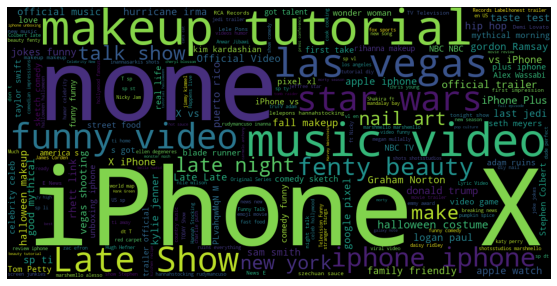

In [11]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("./images/WordCloud_tags.png")

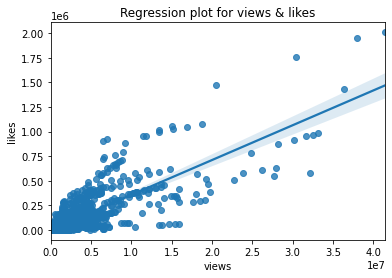

In [12]:
sns.regplot(data = videos, x = "views", y = "likes")
plt.title("Regression plot for views & likes")
plt.savefig("./images/regression.png")

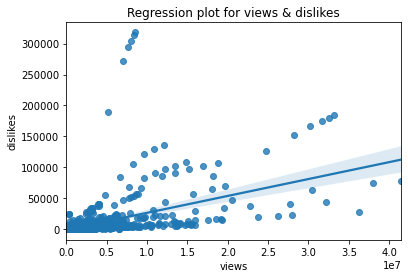

In [13]:
sns.regplot(data = videos, x = "views", y = "dislikes")
plt.title("Regression plot for views & dislikes")
plt.savefig("./images/regression_dislikes.png")

In [14]:
df_corr = videos[["views","likes","dislikes"]]

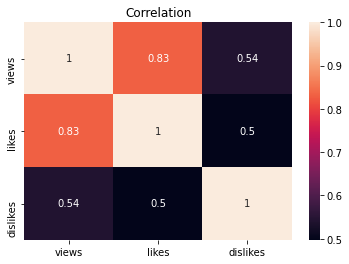

In [16]:
sns.heatmap(df_corr.corr(), annot =True)
plt.title("Correlation")
plt.savefig("./images/corr.png")